In [ ]:
# Nome: Vinicius Luna Rodrigues dos Santos RM: 99069
# Nome: Vinicius Gontijo Santos RM: 550657

In [ ]:
# Fonte dos dados: Kaggle
# Nome dataset: Sleep Health and Lifestyle Dataset

In [6]:
import pandas as pd

# Dataset sobre saúde do sono e estilo de vida
Explicação sobre as colunas:

- Gender: Genêro

- Age: Idade em anos

- Occupation: Profissão

- Sleep Duration: Duração do sono em horas

- Quality of Sleep: Qualidade do sono numa escala de 1 a 10

- Physical Activity Level: Quantidade de minutos que a pessoa pratica atividade
física por dia

- Stress Level: Nível de estresse de 1 a 10

- BMI Category: Categoria do IMC (Abaixo do peso, Normal, Acima do peso)

- Blood Pressure: Pressão arterial

- Heart Rate: Frequência cardíaca- Daily Steps: O número de passos diários

- Sleep Disorder: Presença ou abstenção de alguma irregularidade para dormir

In [7]:
df = pd.read_csv("sleep_health.csv", sep = ",");

In [8]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
def sleep_rate(value):
  if value < 6:
    return 'Bad'
  elif value < 8:
    return 'Normal'
  else:
    return 'Good'

In [10]:
df['Rate of Sleep'] = df['Quality of Sleep'].apply(sleep_rate)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Qualidade do sono de acordo com a idade')

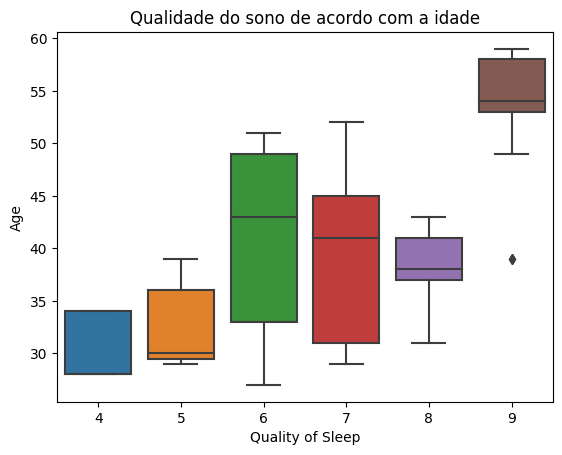

In [12]:
sns.boxplot(x="Quality of Sleep", y="Age", data=df, )
plt.title("Qualidade do sono de acordo com a idade")

Text(0.5, 1.0, 'Nível de estresse de acordo com o IMC')

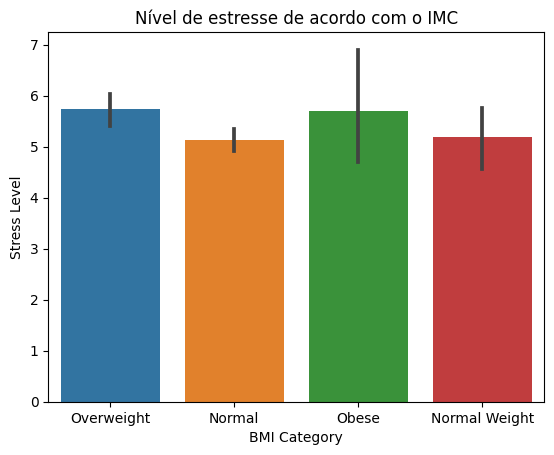

In [13]:
sns.barplot(x='BMI Category', y='Stress Level', data=df)
plt.title("Nível de estresse de acordo com o IMC")

Text(0.5, 1.0, 'Qualidade do sono de acordo com o nível de estresse')

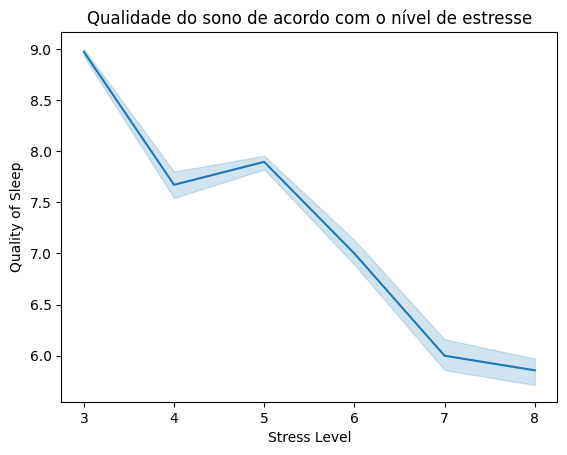

In [14]:
sns.lineplot(x='Stress Level', y='Quality of Sleep', data=df)
plt.title("Qualidade do sono de acordo com o nível de estresse")

Text(0.5, 1.0, 'Duração do sono de acordo com o nível de estresse')

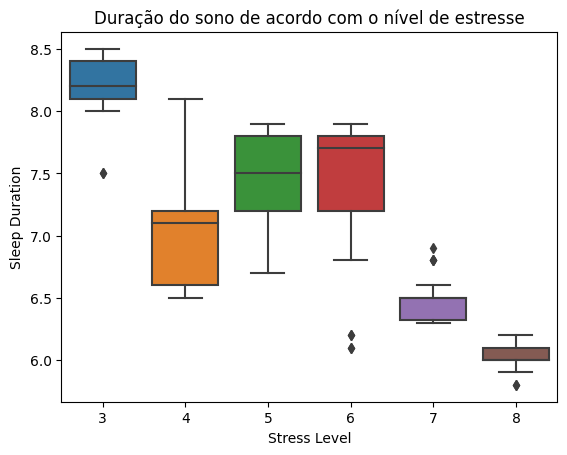

In [15]:
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title("Duração do sono de acordo com o nível de estresse")

Text(0.5, 1.0, 'Nível de estresse de acordo com o sexo')

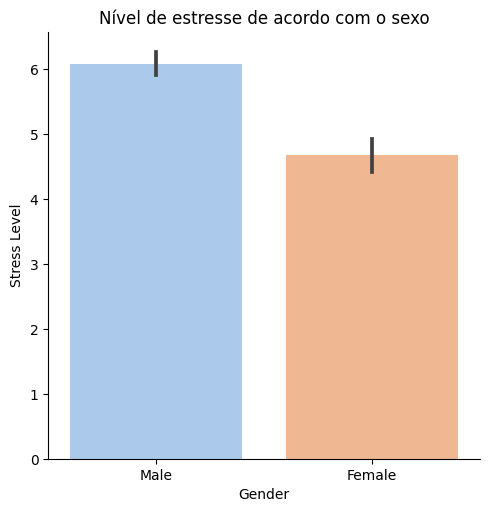

In [16]:
sns.catplot(data=df, kind="bar", x='Gender', y='Stress Level', palette='pastel')
plt.title("Nível de estresse de acordo com o sexo")

# Modelo treinado para predizer o nível de estresse

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
## MODELO TREINADO PARA PREDIZER O NIVEL DE ESTRESSE

# Escolhendo as colunas preditivas e a coluna alvo
x = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level']]
y = df['Stress Level']

#Divindindo o conjunto de treinamento e o conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression() # Criando objeto regressor

lr.fit(x_train,y_train) # Treinando o regressor

LinearRegression()

In [21]:
y_predicoes = lr.predict(x_test)

In [22]:
from sklearn.metrics import r2_score

In [23]:
R2 = r2_score(y_true = y_test,
              y_pred = y_predicoes)
R2 # Quanto mais próximo de 1, melhor

0.8392965827285749

In [24]:
import pickle

In [25]:
##Salvando o modelo
with open('stress_model', 'wb') as f:
    pickle.dump(lr, f)

# Modelo treinado para predizer a qualidade do sono

In [26]:
## MODELO TREINADO PARA PREDIZER A QUALIDADE DO SONO

# Escolhendo as colunas preditivas e a coluna alvo
x = df[['Age', 'Sleep Duration', 'Physical Activity Level']]
y = df['Quality of Sleep']

#Divindindo o conjunto de treinamento e o conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [27]:
lr = LinearRegression() # Criando objeto regressor

lr.fit(x_train,y_train) # Treinando o regressor


LinearRegression()

In [28]:
y_predicoes = lr.predict(x_test)

In [29]:
R2 = r2_score(y_true = y_test,
              y_pred = y_predicoes)
R2 # Quanto mais próximo de 1, melhor

0.8107867995641267

In [30]:
##Salvando o modelo
with open('sleep_quality_model', 'wb') as f:
    pickle.dump(lr, f)